In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('Dry_Bean_Dataset.csv')
# print(df)
display(df)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
df.shape

(13611, 17)

In [4]:
df["Class"].value_counts()
# prefer to F1-score than validation score (accuracy) because the number of examples in both class labels are not so equal distributed
# but still considered both in process? -> ask tutor

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [5]:
df.isna().sum()
#data set has no missing values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Feature col:  Area
Feature col:  Perimeter
Feature col:  MajorAxisLength
Feature col:  MinorAxisLength
Feature col:  AspectRation
Feature col:  Eccentricity
Feature col:  ConvexArea
Feature col:  EquivDiameter
Feature col:  Extent
Feature col:  Solidity
Feature col:  roundness
Feature col:  Compactness
Feature col:  ShapeFactor1
Feature col:  ShapeFactor2
Feature col:  ShapeFactor3
Feature col:  ShapeFactor4


IndexError: index 16 is out of bounds for axis 0 with size 16

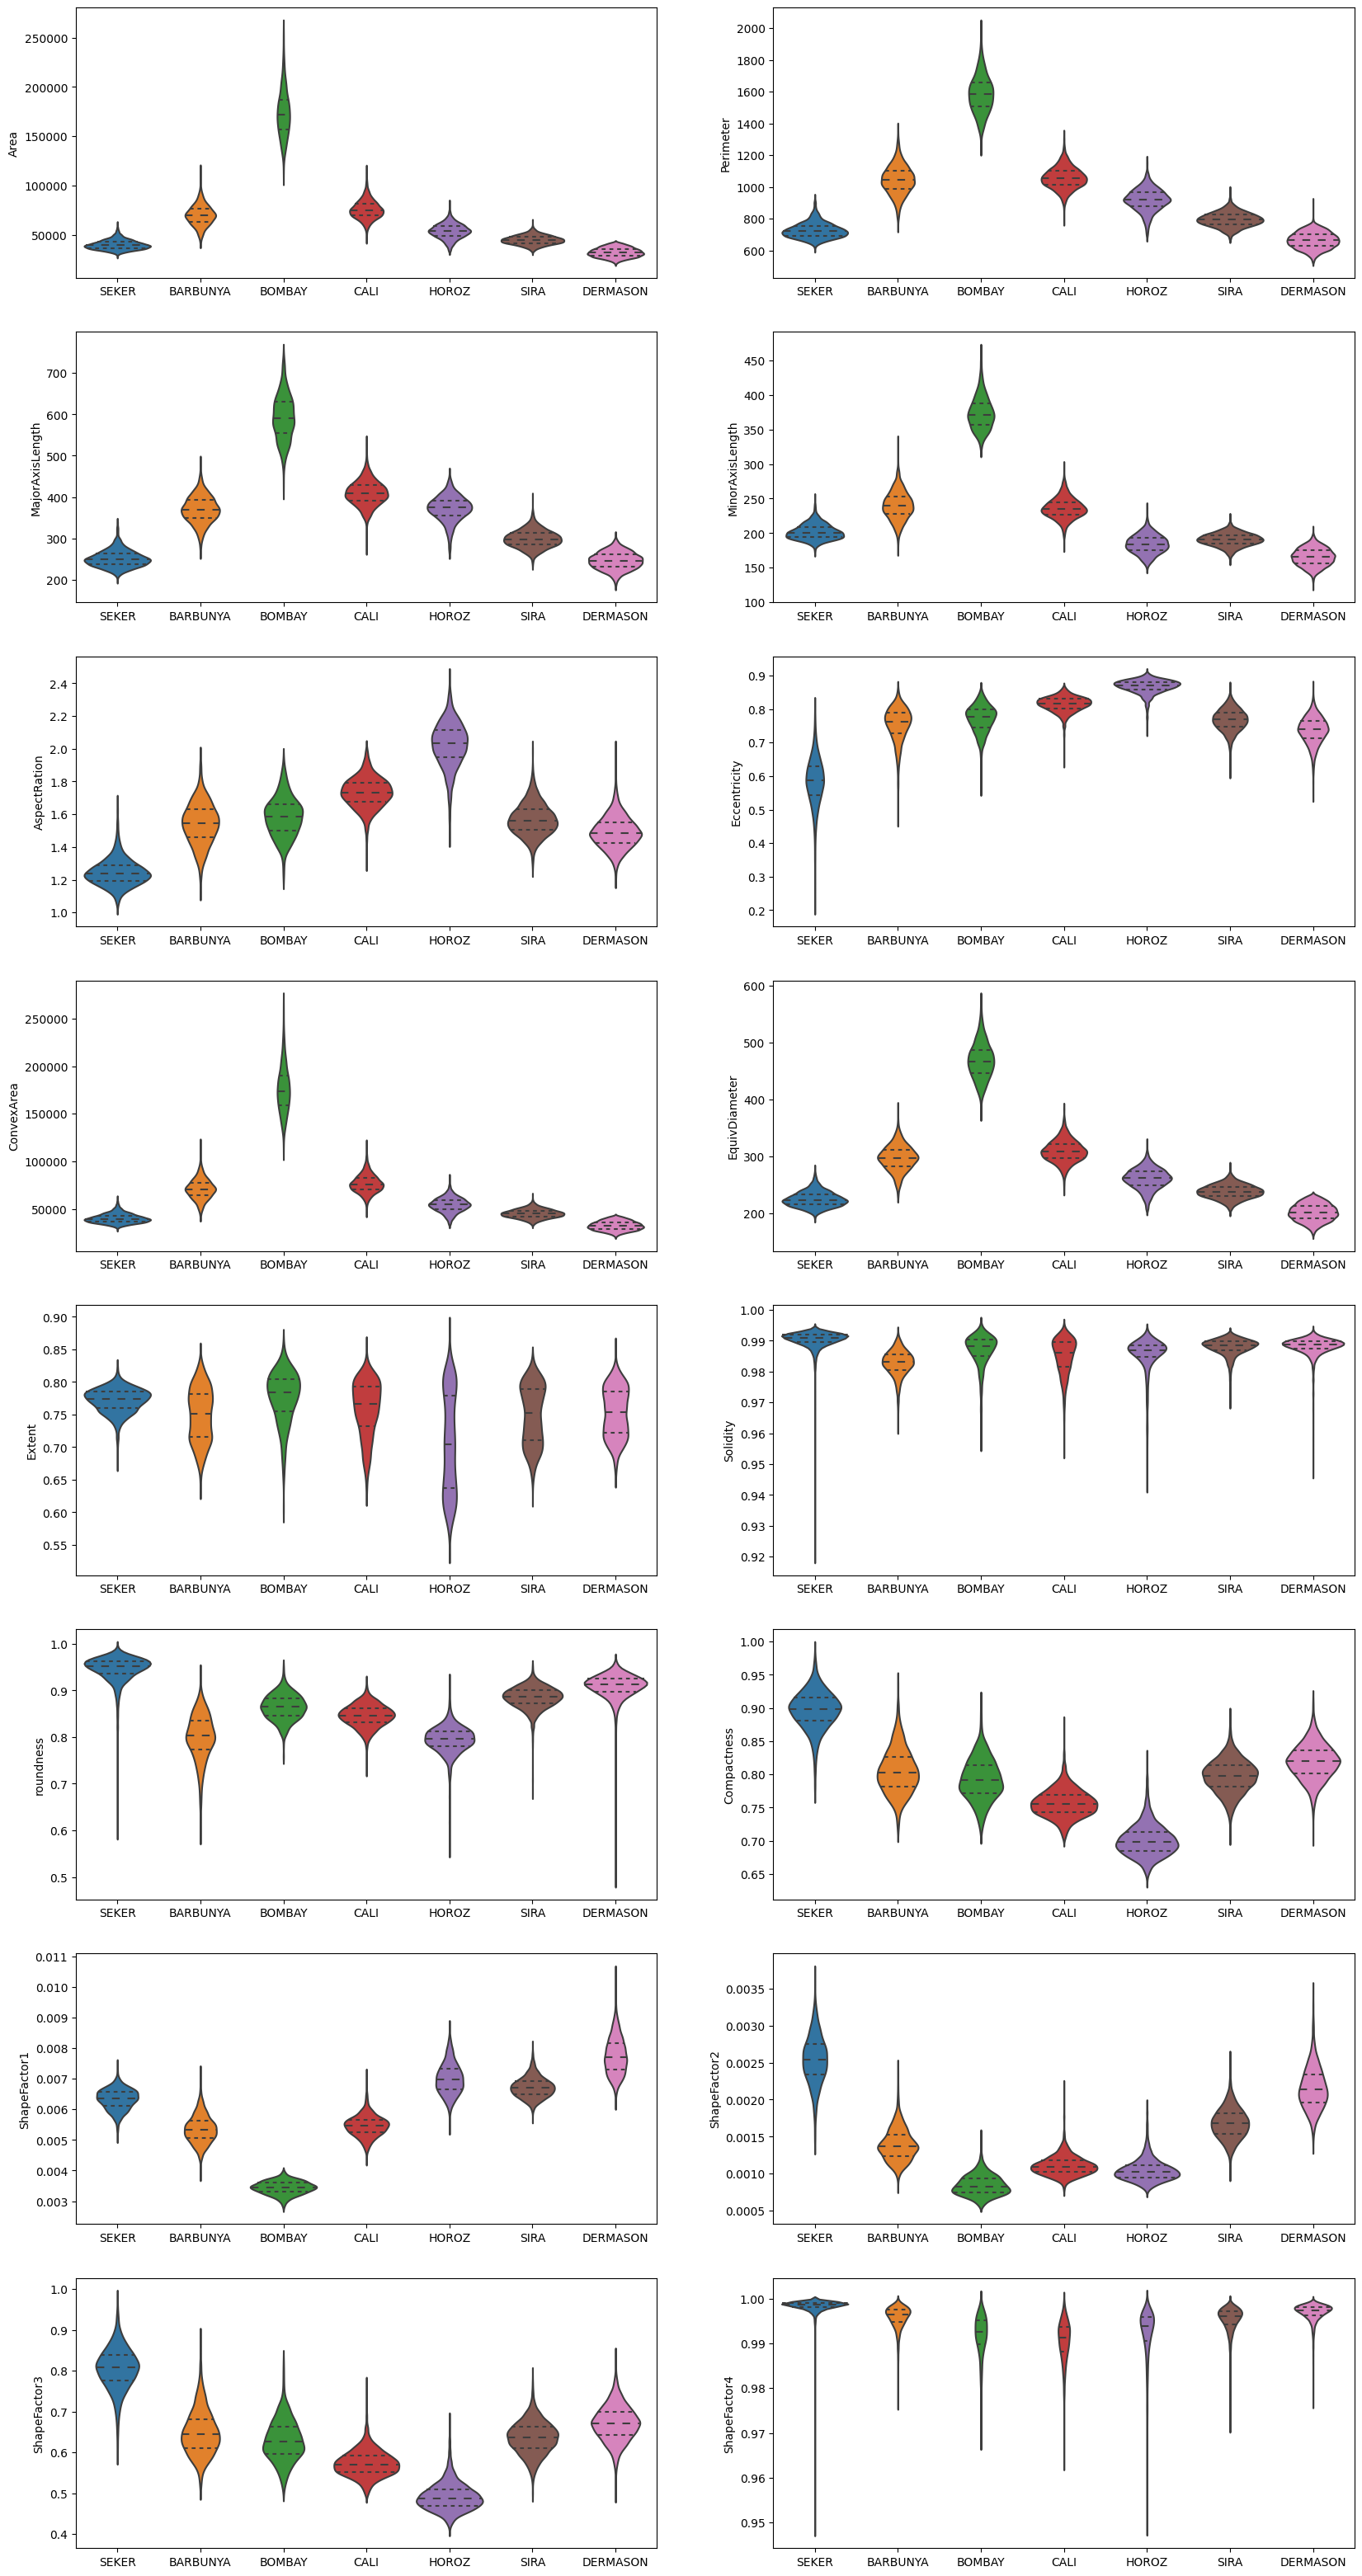

In [19]:
# Outlier stuff here
from matplotlib import pyplot as plt
num_df_columns = df.columns.drop(["Class"])
fig , axes = plt.subplots(8,2 , figsize=(20,40))

bean_count = df["Class"].count()

for i in range(bean_count):
    
    for j in range(2):
        feature_col = num_df_columns[j + i * 2 ]
        
        sns.violinplot(data=df,
               x="Class",
               y=feature_col,
               inner="quartile",
               ax=axes[i,j])
        
        axes[i,j].set_xlabel(None)

In [6]:
# Remove missing values here, before we split it into X and y?
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as tts
z=5

# Need pipelines for:
# - Logistics regression
# - KNN classifier
# - Decision tree (see below)
scaler = RobustScaler()
pipe_dt = Pipeline([
    ("scaler", scaler), # switch out for another thing?
    ("classify", tree.DecisionTreeClassifier())
])

X_train_dt, X_test_dt, y_train_dt, y_test_dt = tts(X, y, test_size=0.20, random_state=42, stratify=y) 

pg_dt = {'classify__min_samples_split': [2,10,50,100,250,600]} 
clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, return_train_score=True)
clf_dt.fit(X_train_dt,y_train_dt)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('classify', DecisionTreeClassifier())]),
             param_grid={'classify__min_samples_split': [2, 10, 50, 100, 250,
                                                         600]},
             return_train_score=True)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

z=5

pipe_knn = Pipeline([
    ("scaler", scaler), # switch out for another thing?
    ("classify", KNeighborsClassifier()) # What params?
])

X_train_knn, X_test_knn, y_train_knn, y_test_knn = tts(X, y, test_size=0.20, random_state=42, stratify=y) 
parameter={"classify__n_neighbors":[10,20,50,100,200]}
knncv=GridSearchCV(pipe_knn,parameter,cv=z, return_train_score=True)
knncv.fit(X_train_knn,y_train_knn)

In [ ]:
from sklearn.linear_model import LogisticRegression

z=5

pipe_lg = Pipeline([
    ("scaler", scaler), # switch out for another thing?
    ("classify", LogisticRegression()) # What params?
])

X_train_lg, X_test_lg, y_train_lg, y_test_lg = tts(X, y, test_size=0.20, random_state=42, stratify=y)

pg_lg = {"classify__C":[0.5,0.01,1,2,3,4,5], 'classify__max_iter':[1,2,3,4,5,10,50]} 
clf_lg = GridSearchCV(pipe_lg, param_grid =pg_lg,cv=z, return_train_score=True)
clf_lg.fit(X_train_lg,y_train_lg)

c:\Users\Hildur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hildur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classify', LogisticRegression())]),
             param_grid={'classify__C': [0.5, 0.01, 1, 2, 3, 4, 5],
                         'classify__max_iter': [1, 2, 3, 4, 5, 10, 50]},
             return_train_score=True)